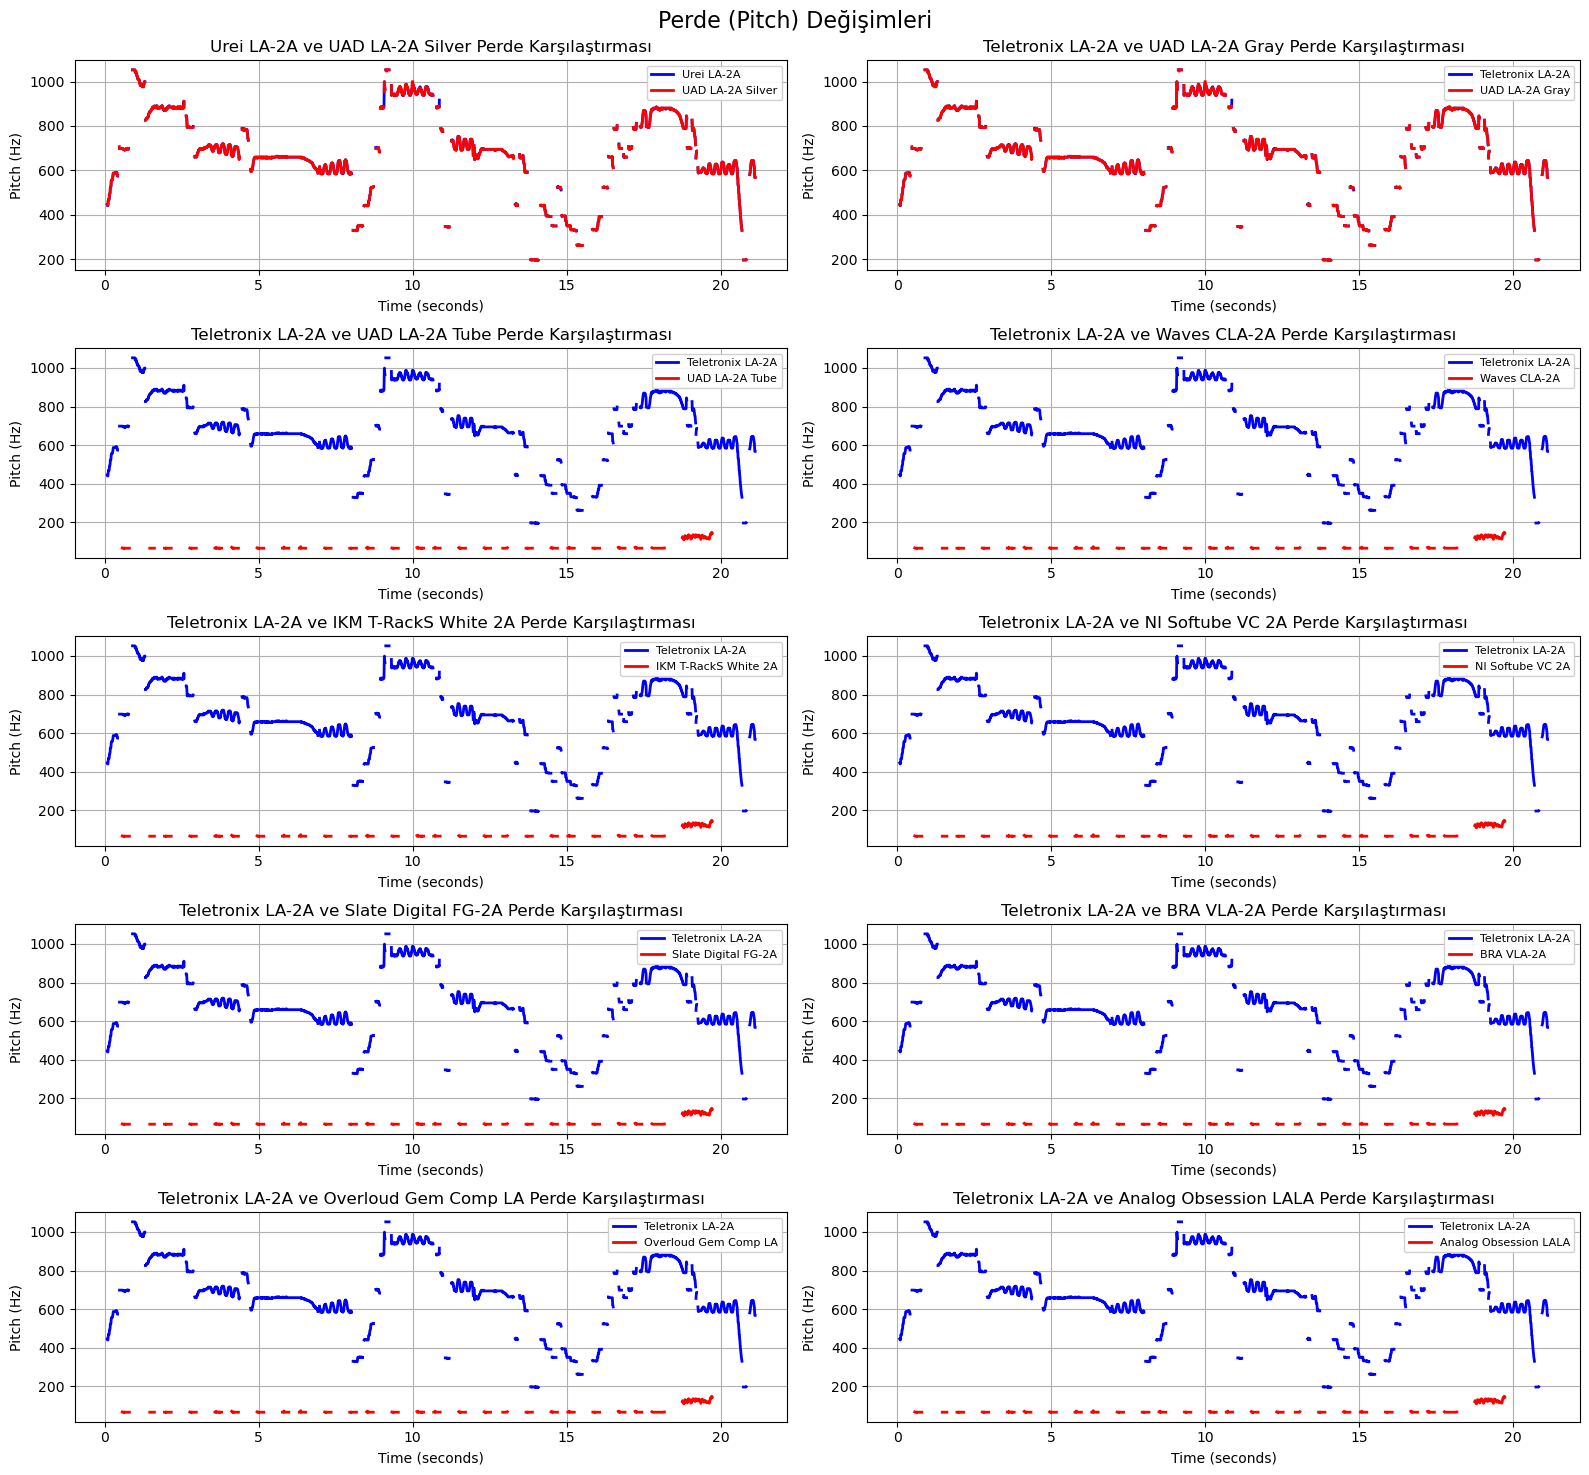

In [14]:
# Özellikle pYIN algoritması kullanılarak, perde (pitch) tespiti yapılır. Bu, sesin temel frekansını (fundamental frequency) belirler.
# y Ekseni: Sesin temel frekansı (Hz).

# Önerilen dosya: SaturnSyndicate.solowetdry_96khz-05 elektro solo

# Librosa sisteminin aktarılması
import matplotlib.pyplot as plt # Grafik ve görselleştirme işlemleri için Matplotlib kütüphanesini yükler.
import numpy as np # Bilimsel hesaplama ve dizi işlemleri için NumPy kütüphanesini yükler.
import librosa # Ses işleme ve analiz için Librosa kütüphanesini yükler.
import librosa.display # Librosa’nın ses grafikleri çizme fonksiyonlarını yükler.
import pyloudnorm as pyln  # LUFS analizini yapar.
import IPython.display as ipd # Ses dosyalarını Jupyter'da çalmak için gerekli IPython fonksiyonlarını yükler.
from IPython.display import Audio, display  # Ses dosyalarını Jupyter hücresinde oynatmaya olanak tanır.
from scipy import signal # Python'daki SciPy kütüphanesinin signal modülünü içe aktarmaya yarar.

# Ses dosyalarının yollarını ve açıklayıcı etiketlerini tanımlama
audio_files = [
    "/Users/nazimerensahin/Desktop/la_2a_processed/Audio Files/SaturnSyndicate.solowetdry_ LA2A Teletronix.wav", 
    "/Users/nazimerensahin/Desktop/la_2a_processed/Audio Files/SaturnSyndicate.solowetdry LA2A Urei.wav",     
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/SaturnSyndicate.solowetdry_uad gray render_03.wav",
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/SaturnSyndicate.solowetdry_uad silver render_06.wav",
    "/Users/nazimerensahin/Desktop/fldr/tube.wav",
    "/Users/nazimerensahin/Desktop/fldr/cla_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/white_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/vc_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/fg_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/vla_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/comp_la.wav",
    "/Users/nazimerensahin/Desktop/fldr/lala.wav",
]

audio_labels = [
    "Teletronix LA-2A",
    "Urei LA-2A",
    "UAD LA-2A Gray",
    "UAD LA-2A Silver",
    "UAD LA-2A Tube",
    "Waves CLA-2A",
    "IKM T-RackS White 2A",
    "NI Softube VC 2A",
    "Slate Digital FG-2A",
    "BRA VLA-2A",
    "Overloud Gem Comp LA",
    "Analog Obsession LALA",
]

# Teletronix LA-2A referansı
teletronix_file = audio_files[0]
teletronix_label = audio_labels[0]
teletronix_sound, teletronix_sr = librosa.load(teletronix_file, sr=None)

# Urei LA-2A referansı
urei_file = audio_files[1]
urei_label = audio_labels[1]
urei_sound, urei_sr = librosa.load(urei_file, sr=None)

# pYIN pitch analizi için ayarlar
fmin = librosa.note_to_hz("C2")
fmax = librosa.note_to_hz("C7")

# Teletronix LA-2A pitch analizi
teletronix_pitch, _, _ = librosa.pyin(teletronix_sound, fmin=fmin, fmax=fmax, sr=teletronix_sr)
teletronix_time = librosa.times_like(teletronix_pitch, sr=teletronix_sr)

# Urei LA-2A pitch analizi
urei_pitch, _, _ = librosa.pyin(urei_sound, fmin=fmin, fmax=fmax, sr=urei_sr)
urei_time = librosa.times_like(urei_pitch, sr=urei_sr)

# Grafik düzeni için ayarlar
n_comparisons = 10  # Toplam karşılaştırma sayısı
n_cols = 2  # Sütun sayısı
n_rows = (n_comparisons + n_cols - 1) // n_cols  # Satır sayısını belirle

# Grafik figürü
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten()

# İlk grafik: Urei LA-2A vs UAD LA-2A Silver
silver_file = audio_files[3]
silver_label = audio_labels[3]
silver_sound, silver_sr = librosa.load(silver_file, sr=None)

silver_pitch, _, _ = librosa.pyin(silver_sound, fmin=fmin, fmax=fmax, sr=silver_sr)
silver_time = librosa.times_like(silver_pitch, sr=silver_sr)

axes[0].plot(urei_time, urei_pitch, label=f"{urei_label}", color="blue", linewidth=2)
axes[0].plot(silver_time, silver_pitch, label=f"{silver_label}", color="red", linewidth=2)
axes[0].set_title(f"{urei_label} ve {silver_label} Perde Karşılaştırması")
axes[0].set_xlabel("Time (seconds)")
axes[0].set_ylabel("Pitch (Hz)")
axes[0].legend(fontsize=8, loc="upper right", frameon=True, framealpha=0.9)
axes[0].grid()

# Kalan grafikler: Teletronix LA-2A ile diğer pluginler
comparison_indices = [2, 4, 5, 6, 7, 8, 9, 10, 11]
for i, idx in enumerate(comparison_indices, start=1):
    file = audio_files[idx]
    label = audio_labels[idx]
    sound, sr = librosa.load(file, sr=None)

    pitch, _, _ = librosa.pyin(sound, fmin=fmin, fmax=fmax, sr=sr)
    time = librosa.times_like(pitch, sr=sr)

    ax = axes[i]
    ax.plot(teletronix_time, teletronix_pitch, label=f"{teletronix_label}", color="blue", linewidth=2)
    ax.plot(time, pitch, label=f"{label}", color="red", linewidth=2)
    ax.set_title(f"{teletronix_label} ve {label} Perde Karşılaştırması")
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("Pitch (Hz)")
    ax.legend(fontsize=8, loc="upper right", frameon=True, framealpha=0.9)
    ax.grid()

# Boş kalan eksenleri temizle
for idx in range(len(comparison_indices) + 1, len(axes)):
    fig.delaxes(axes[idx])

# Genel düzenleme ve gösterim
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle("Perde (Pitch) Değişimleri", fontsize=16)
plt.show()
